In [ ]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import os
import csv
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
import joblib
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix , accuracy_score, precision_score, recall_score, f1_score, roc_curve ,roc_auc_score,ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pwd
os.chdir('/content/drive/MyDrive/Colab Notebooks/Data/SIFT')
!pwd

/content
/content/drive/MyDrive/Colab Notebooks/Data/SIFT


In [ ]:
# import tensorflow as tf
#
# # Check if GPU is available
# if not tf.test.gpu_device_name():
#     print('GPU device not found')
# else:
#     print('GPU available:', tf.test.gpu_device_name())
# not required here, using colab's builtin T4 GPU

In [ ]:
Normal = '/content/drive/MyDrive/Colab Notebooks/Data/SIFT/NormalVid'
Abnormal = '/content/drive/MyDrive/Colab Notebooks/Data/SIFT/Abnormal'

In [ ]:
import zipfile

#!unzip "/content/drive/MyDrive/Colab Notebooks/Data/SIFT/NormalVid/NormalVid(small2).zip"


unzip:  cannot find or open /content/drive/MyDrive/Colab Notebooks/Data/SIFT/NormalVid/NormalVid(small2).zip, /content/drive/MyDrive/Colab Notebooks/Data/SIFT/NormalVid/NormalVid(small2).zip.zip or /content/drive/MyDrive/Colab Notebooks/Data/SIFT/NormalVid/NormalVid(small2).zip.ZIP.


In [ ]:
# import cupy as cp


i=0
for filename in os.listdir(Abnormal):
    img = cv2.imread(os.path.join(Abnormal, filename))
    if img is not None:

        #grayscaling the image dataset
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img2 = cv2.GaussianBlur(gray, (5, 5), 0)  # gaussian Image

        # creating a Histograms Equalization for folder1(Fall)
        equ = cv2.equalizeHist(img2)

        #Applyed
        canny = cv2.Canny(equ, 150, 150)

        #Applying Sift  Discriptor Abnormal folder
        sift = cv2.SIFT_create()
        kp, des = sift.detectAndCompute(canny, None)

        #convert the descriptor array into a dataframe format
        out = pd.DataFrame(des)
        print("descriptor shape ", i, " : ", out.shape)
        i = i + 1

        csv_data = out.to_csv('folder1.csv', mode='w', header=False, index=False)


descriptor shape  0  :  (38, 128)
descriptor shape  1  :  (36, 128)
descriptor shape  2  :  (43, 128)
descriptor shape  3  :  (41, 128)
descriptor shape  4  :  (42, 128)
descriptor shape  5  :  (43, 128)
descriptor shape  6  :  (43, 128)
descriptor shape  7  :  (39, 128)
descriptor shape  8  :  (41, 128)
descriptor shape  9  :  (42, 128)
descriptor shape  10  :  (28, 128)
descriptor shape  11  :  (27, 128)
descriptor shape  12  :  (35, 128)
descriptor shape  13  :  (30, 128)
descriptor shape  14  :  (30, 128)
descriptor shape  15  :  (30, 128)
descriptor shape  16  :  (28, 128)
descriptor shape  17  :  (34, 128)
descriptor shape  18  :  (45, 128)
descriptor shape  19  :  (27, 128)
descriptor shape  20  :  (44, 128)
descriptor shape  21  :  (33, 128)
descriptor shape  22  :  (36, 128)
descriptor shape  23  :  (38, 128)
descriptor shape  24  :  (43, 128)
descriptor shape  25  :  (33, 128)
descriptor shape  26  :  (30, 128)
descriptor shape  27  :  (34, 128)
descriptor shape  28  :  (42, 

In [ ]:


i=0
for filename in os.listdir(Normal):
    img = cv2.imread(os.path.join(Normal, filename))
    if img is not None:

        #grayscaling the image dataset
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img2 = cv2.GaussianBlur(gray, (5, 5), 0)  # gaussian Image

        # creating a Histograms Equalization for folder1(Fall)
        equ = cv2.equalizeHist(img2)

        # cv2.imshow('Chain Snatching Detection', equ)

        #Applyed
        canny = cv2.Canny(equ, 150, 150)

        #Applying Sift  Discriptor Abnormal folder
        sift = cv2.SIFT_create()
        kp, des = sift.detectAndCompute(canny, None)

        #convert the descriptor array into a dataframe format
        out = pd.DataFrame(des)
        print("descriptor shape ", i, " : ", out.shape)
        i = i + 1

        csv_data = out.to_csv('normal.csv', mode='w', header=False, index=False)

descriptor shape  0  :  (23, 128)
descriptor shape  1  :  (20, 128)
descriptor shape  2  :  (14, 128)
descriptor shape  3  :  (24, 128)
descriptor shape  4  :  (18, 128)
descriptor shape  5  :  (21, 128)
descriptor shape  6  :  (23, 128)
descriptor shape  7  :  (25, 128)
descriptor shape  8  :  (18, 128)
descriptor shape  9  :  (26, 128)
descriptor shape  10  :  (18, 128)
descriptor shape  11  :  (26, 128)
descriptor shape  12  :  (18, 128)
descriptor shape  13  :  (23, 128)
descriptor shape  14  :  (20, 128)
descriptor shape  15  :  (17, 128)
descriptor shape  16  :  (20, 128)
descriptor shape  17  :  (27, 128)
descriptor shape  18  :  (24, 128)
descriptor shape  19  :  (26, 128)
descriptor shape  20  :  (19, 128)
descriptor shape  21  :  (24, 128)
descriptor shape  22  :  (24, 128)
descriptor shape  23  :  (24, 128)
descriptor shape  24  :  (20, 128)
descriptor shape  25  :  (19, 128)
descriptor shape  26  :  (18, 128)
descriptor shape  27  :  (24, 128)
descriptor shape  28  :  (23, 

In [ ]:
# cp.cuda.Device(0).use()
# Load the CSV files into pandas DataFrames
chain_df = pd.read_csv('folder1.csv',header=None,dtype='uint8')
chain_df=chain_df.astype(np.uint8)


normal_df = pd.read_csv('normal.csv',header=None,dtype='uint8')
normal_df = normal_df.astype(np.uint8)


In [ ]:
# # Add a new column for the labels
#chain_df['label'] = 1
#normal_df['label'] = 0

In [ ]:
# Appending
data = normal_df._append(chain_df)

In [ ]:
#Save
csv_data=data.to_csv('finalData.csv', mode='w', header=False,index=False)

In [ ]:
# Combine the two DataFrames into one
df = pd.concat([chain_df, normal_df], ignore_index=True)

In [ ]:
#read the data from the previously saved csv file
data = pd.read_csv('finalData.csv',header=None,dtype='uint8')
data=data.astype(np.uint8)
data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

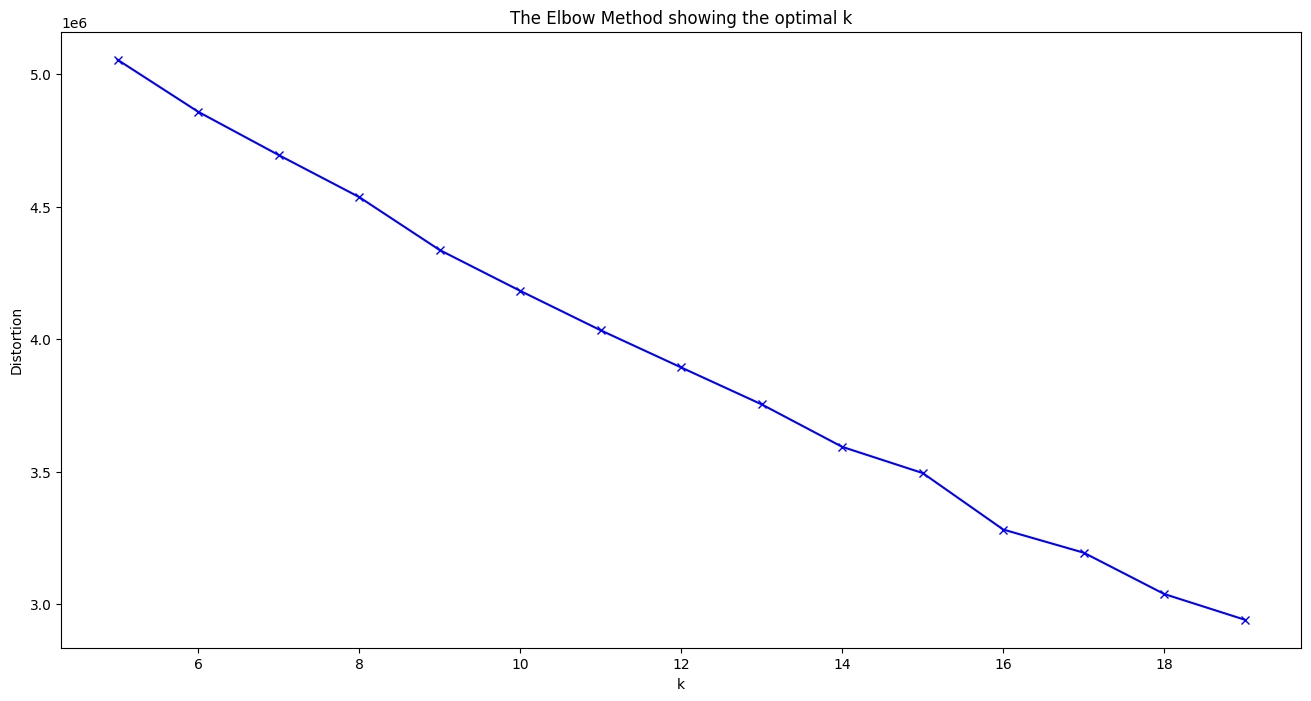

In [ ]:
distortions = []
K = range(5,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
##    K meanse Clustring
#Applying Kmeans
kmeans = KMeans(n_clusters=12)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=12)

In [ ]:
#save the model to disk
import pickle
filename = 'Kmeans_CL_2_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [ ]:
#calculate histogram of trained kmeans
hist = np.histogram(kmeans.labels_,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12])

print("Histogram of trained kmeans")
print(hist, "\n")

Histogram of trained kmeans
(array([3, 9, 3, 5, 6, 7, 3, 3, 3, 4, 7, 3]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])) 



In [ ]:
#performing kmeans prediction on the Abnormal with the pretrained kmeans model

#initialising i=0; as it is the first class
i=0
data=[]
#k=0

for filename in os.listdir(Abnormal):
    #path
    path=os.path.join(Abnormal,filename)
    a=cv2.imread(path)

    #gray image
    gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)

    # creating a Histograms Equalization for folder1(Fall)
    equ = cv2.equalizeHist(gray)

    #Applyeda
    canny = cv2.Canny(equ, 150, 150)
    #Applying Sift  Discriptor Abnormal folder
    sift = cv2.SIFT_create()
    kp, descriptors = sift.detectAndCompute(canny, None)

    out=pd.DataFrame(descriptors)

    array_double = np.array(out, dtype=np.double)
    try:
        a=kmeans.predict(array_double)
    except:
        print(filename)
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12])

    #append the dataframe into the array
    data.append(hist[0])


#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class
Output["Class"] = i
csv_data=Output.to_csv('finalAbnormal.csv', mode='w',header=False,index=False)

In [ ]:
#performing kmeans prediction on the Normal with the pretrained kmeans model

#initialising i=1; as it is the first class
i=1
data=[]
#k=0

for filename in os.listdir(Normal):
    #path
    path=os.path.join(Normal,filename)
    a=cv2.imread(path)

    #gray image
    gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)

    # creating a Histograms Equalization for folder1(Fall)
    equ = cv2.equalizeHist(gray)

    #Applyeda
    canny = cv2.Canny(equ, 150, 150)
    #Applying Sift  Discriptor Abnormal folder
    sift = cv2.SIFT_create()
    kp, descriptors = sift.detectAndCompute(canny, None)

    out=pd.DataFrame(descriptors)

    array_double = np.array(out, dtype=np.double)
    try:
        a=kmeans.predict(array_double)
    except:
        print(filename)
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12])

    #append the dataframe into the array
    data.append(hist[0])


#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class
Output["Class"] = i
csv_data=Output.to_csv('finalNormal.csv', mode='w',header=False,index=False)

In [ ]:

#Displaying the kmeans predicted data
print("Abnormal")
dat1= pd.read_csv('finalAbnormal.csv',header=None)
print(dat1)

Abnormal
     0   1   2   3   4   5   6   7   8   9   10  11  12
0     1   6   0   1   3  11   3   0   2   0   9   2   0
1     2   9   3   1   3   3   1   0   0   0   7   1   0
2     1   5   1   0   6  15   5   0   4   0  14   1   0
3     2   5   0   3   2  14   2   0   1   2  12   1   0
4     2   5   3   2   5   8   4   0   1   1  11   1   0
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
248   2   2   3   3   4  10   2   2   1   0   9   0   0
249   3   4   1   2   1   3   2   2   3   1   8   0   0
250   4   3   2   3   8   5   4   2   4   2   9   0   0
251   0   2   1   2   6   3   3   5   2   0  11   0   0
252   1   4   2   2   4   7   1   4   1   0   9   1   0

[253 rows x 13 columns]


In [ ]:
#Displaying the kmeans predicted data
print("Normal")
dat2= pd.read_csv('finalNormal.csv',header=None)
print(dat2)

Normal
     0   1   2   3   4   5   6   7   8   9   10  11  12
0     3   1   3   0   1   7   2   3   0   2   9   3   1
1     3   3   4   2   2   4   2   3   1   2   7   1   1
2     1   3   2   5   1   7   2   2   3   2   8   2   1
3     0   4   6   2   2   5   2   1   1   2   9   3   1
4     2   3   3   2   0   4   3   2   0   3   6   1   1
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
579   1   9   1   1   4  11   4   1   0   2   3   2   1
580   1  10   3   4   3   8   1   1   1   3   8   4   1
581   1  11   1   1   2   4   1   0   0   5   4   5   1
582   1  10   0   1   2   3   2   1   0   7   3   6   1
583   2  11   0   1   2   4   1   1   0   7   1   5   1

[584 rows x 13 columns]


In [ ]:
#combining by appending All kmeans predicted data
A = dat1._append(dat2)
A

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,6,0,1,3,11,3,0,2,0,9,2,0
1,2,9,3,1,3,3,1,0,0,0,7,1,0
2,1,5,1,0,6,15,5,0,4,0,14,1,0
3,2,5,0,3,2,14,2,0,1,2,12,1,0
4,2,5,3,2,5,8,4,0,1,1,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,1,9,1,1,4,11,4,1,0,2,3,2,1
580,1,10,3,4,3,8,1,1,1,3,8,4,1
581,1,11,1,1,2,4,1,0,0,5,4,5,1
582,1,10,0,1,2,3,2,1,0,7,3,6,1


In [ ]:
#save the predicted data into csv file
csv_data=A.to_csv('FinalFeatures2.csv', mode='w',header=False,index=False)

# Reading the Finally extracted clustered SIFT Vector Before applying Classifiers

In [ ]:
df= pd.read_csv('FinalFeatures2.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,6,0,1,3,11,3,0,2,0,9,2,0
1,2,9,3,1,3,3,1,0,0,0,7,1,0
2,1,5,1,0,6,15,5,0,4,0,14,1,0
3,2,5,0,3,2,14,2,0,1,2,12,1,0
4,2,5,3,2,5,8,4,0,1,1,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,1,9,1,1,4,11,4,1,0,2,3,2,1
833,1,10,3,4,3,8,1,1,1,3,8,4,1
834,1,11,1,1,2,4,1,0,0,5,4,5,1
835,1,10,0,1,2,3,2,1,0,7,3,6,1


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,6,0,1,3,11,3,0,2,0,9,2,0
1,2,9,3,1,3,3,1,0,0,0,7,1,0
2,1,5,1,0,6,15,5,0,4,0,14,1,0
3,2,5,0,3,2,14,2,0,1,2,12,1,0
4,2,5,3,2,5,8,4,0,1,1,11,1,0


In [ ]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
832,1,9,1,1,4,11,4,1,0,2,3,2,1
833,1,10,3,4,3,8,1,1,1,3,8,4,1
834,1,11,1,1,2,4,1,0,0,5,4,5,1
835,1,10,0,1,2,3,2,1,0,7,3,6,1
836,2,11,0,1,2,4,1,1,0,7,1,5,1


In [ ]:
#Check for NaN under a single DataFrame column
df.isnull().values.any()

False

In [ ]:
X = df.drop(columns= 12, axis=1)

In [ ]:
Y = df[12]

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,6,0,1,3,11,3,0,2,0,9,2
1,2,9,3,1,3,3,1,0,0,0,7,1
2,1,5,1,0,6,15,5,0,4,0,14,1
3,2,5,0,3,2,14,2,0,1,2,12,1
4,2,5,3,2,5,8,4,0,1,1,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...
832,1,9,1,1,4,11,4,1,0,2,3,2
833,1,10,3,4,3,8,1,1,1,3,8,4
834,1,11,1,1,2,4,1,0,0,5,4,5
835,1,10,0,1,2,3,2,1,0,7,3,6


In [ ]:
Y


0      0
1      0
2      0
3      0
4      0
      ..
832    1
833    1
834    1
835    1
836    1
Name: 12, Length: 837, dtype: int64

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,
                                                 test_size=0.30, random_state = 0)
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (585, 12)
Number transactions y_train dataset:  (585,)
Number transactions X_test dataset:  (252, 12)
Number transactions y_test dataset:  (252,)


### RandomForest

--------------------------------------------------------------------------------
Applying Random Forest
1.0
--------------------------------------------------------------------------------
Accuracy on Test data :  0.9285714285714286
--------------------------------------------------------------------------------
Presion : 0.9611111111111111
--------------------------------------------------------------------------------
Recall : 0.9402173913043478
--------------------------------------------------------------------------------
F1 score :  0.9505494505494505
-----------------------------------------------------------------------------------


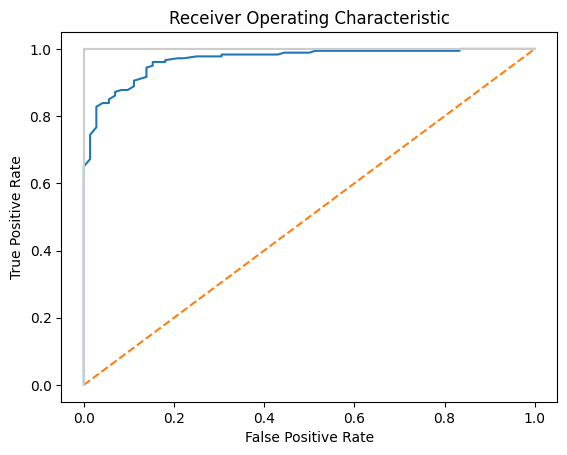

['RandomForest.pkl']

In [ ]:

modelRF = RandomForestClassifier()
modelRF.fit(X_train,Y_train)

## produce a confusion matrix ##
#ConfusionMatrixDisplay(modelRF, X_test, Y_test)
#plt.show()

# accuracy on training data
X_train_prediction = modelRF.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)
print("--------------------------------------------------------------------------------")

print("Applying Random Forest")
print(train_data_accuracy)

# accuracy on test data
X_test_prediction = modelRF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print("--------------------------------------------------------------------------------")
print('Accuracy on Test data : ', test_data_accuracy)

print("--------------------------------------------------------------------------------")

print('Presion :',precision_score(X_test_prediction,Y_test))
print("--------------------------------------------------------------------------------")

print('Recall :',recall_score(X_test_prediction,Y_test))
print("--------------------------------------------------------------------------------")

print('F1 score : ', f1_score(X_test_prediction,Y_test))
print("-----------------------------------------------------------------------------------")
## produce a ROC plot ##
#obtain prediction probabilities
y_prob = modelRF.predict_proba(X_test)
#calculate false & true positive rates
fpr,tpr,_ = roc_curve(Y_test, y_prob[:,1])
#construct plot
plt.plot(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
joblib.dump(modelRF, 'RandomForest.pkl')

### Random Forest Using K_Fold

accuracy of each fold - [0.7666666666666667, 0.6083333333333333, 0.9583333333333334, 0.9416666666666667, 0.9495798319327731, 0.9411764705882353, 0.8319327731092437]
--------------------------------------------------------------------
Avg accuracy : 0.856812725090036
Avg precision: 0.9938203463203463
Avg recall: 0.856812725090036
Avg f1-score: 0.9146220051017625


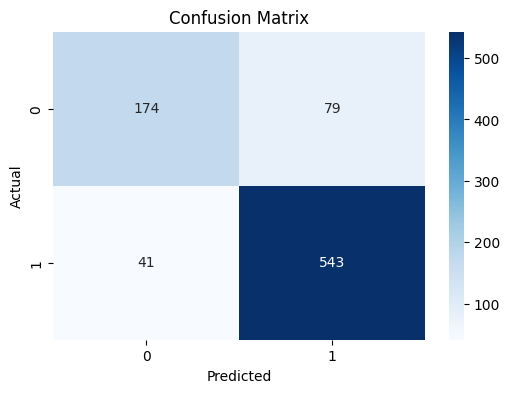

['RandomForest_Kfold.pkl']

In [ ]:
# k = 7
# kf = KFold(n_splits=k, random_state=None)
# modelRFK = RandomForestClassifier()
#
# acc_score = []
# for train_index , test_index in kf.split(X):
#     X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
#     y_train , y_test = Y[train_index] , Y[test_index]
#
#
#
#     modelRFK.fit(X_train,y_train)
#
#     pred_values = modelRFK.predict(X_test)
#     acc = accuracy_score(pred_values , y_test)
#     acc_score.append(acc)
#
# avg_acc_score = sum(acc_score)/k
#
# print('accuracy of each fold - {}'.format(acc_score))
# print('Avg accuracy : {}'.format(avg_acc_score))
# joblib.dump(modelRFK, 'RandomForest_Kfold.pkl')

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Train and test the Random Forest model using k-fold cross validation
k = 7
kf = KFold(n_splits=k, random_state=None)
modelRFK = RandomForestClassifier()

conf_matrices = []
acc_score = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = Y[train_index], Y[test_index]

    modelRFK.fit(X_train, y_train)

    pred_values = modelRFK.predict(X_test)
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)

    # Calculate classification metrics

    precision, recall, f1, _ = precision_recall_fscore_support(y_test, pred_values, average='weighted',zero_division=1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
       # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, pred_values)
    conf_matrices.append(conf_matrix)

avg_acc_score = sum(acc_score) / k
avg_precision_score = sum(precision_scores) / k
avg_recall_score = sum(recall_scores) / k
avg_f1_score = sum(f1_scores) / k



print('accuracy of each fold - {}'.format(acc_score))
# Print average performance metrics
print("--------------------------------------------------------------------")
print('Avg accuracy : {}'.format(avg_acc_score))
print('Avg precision: {}'.format(avg_precision_score))
print('Avg recall: {}'.format(avg_recall_score))
print('Avg f1-score: {}'.format(avg_f1_score))

# Plot the confusion matrix
avg_conf_matrix = sum(conf_matrices)
plt.figure(figsize=(6, 4))
sns.heatmap(avg_conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['0','1'], yticklabels=['0','1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Save model to disk
joblib.dump(modelRFK, 'RandomForest_Kfold.pkl')


### LogisticRegression K_Fold

accuracy of each fold - [0.7333333333333333, 0.6166666666666667, 0.95, 0.8916666666666667, 0.8823529411764706, 0.9327731092436975, 0.8739495798319328]
--------------------------------------------------------------------
Avg accuracy : 0.840106042416967
Avg precision: 0.9928571428571429
Avg recall: 0.840106042416967
Avg f1-score: 0.9053177912769066


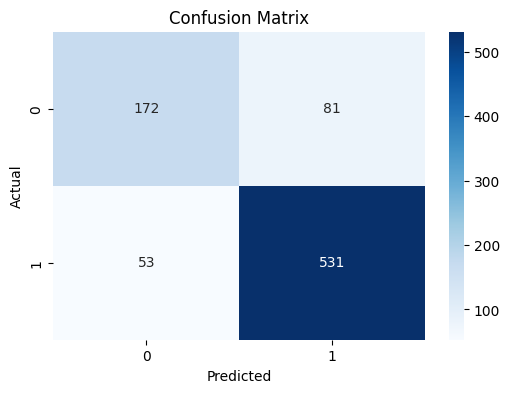

['LogisticRegression.pkl']

In [ ]:
from sklearn.linear_model import LogisticRegression
k = 7
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')

conf_matrices = []
acc_score = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = Y[train_index] , Y[test_index]



    model.fit(X_train,y_train)

    pred_values = model.predict(X_test)
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)

      # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, pred_values)
    conf_matrices.append(conf_matrix)

     # Calculate classification metrics
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, pred_values, average='weighted', zero_division=1)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

avg_acc_score = sum(acc_score)/k
avg_precision_score = sum(precision_scores) / k
avg_recall_score = sum(recall_scores) / k
avg_f1_score = sum(f1_scores) / k

print('accuracy of each fold - {}'.format(acc_score))
# Print average performance metrics
print("--------------------------------------------------------------------")
print('Avg accuracy : {}'.format(avg_acc_score))
print('Avg precision: {}'.format(avg_precision_score))
print('Avg recall: {}'.format(avg_recall_score))
print('Avg f1-score: {}'.format(avg_f1_score))

# Plot the confusion matrix
avg_conf_matrix = sum(conf_matrices)
plt.figure(figsize=(6, 4))
sns.heatmap(avg_conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['0','1'], yticklabels=['0','1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save model to disk
joblib.dump(modelRFK, 'LogisticRegression.pkl')

# SVM with K_Fold

Accuracy of each fold - [0.9047619047619048, 0.8928571428571429, 0.8802395209580839, 0.9161676646706587, 0.9101796407185628]
Average accuracy: 0.9008411747932706
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       253
           1       0.92      0.93      0.93       584

    accuracy                           0.90       837
   macro avg       0.88      0.88      0.88       837
weighted avg       0.90      0.90      0.90       837



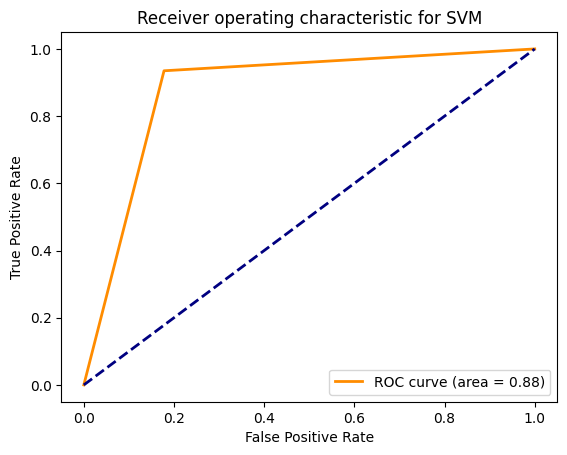

['svm.pkl']

In [ ]:
from sklearn.model_selection import cross_val_score
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=None)
model_svm = svm.SVC(kernel='linear')


acc_score = []
y_true = []
y_pred = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = Y[train_index] , Y[test_index]

    model_svm.fit(X_train, y_train)

    pred_values = model_svm.predict(X_test)
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)

    y_true.extend(y_test)
    y_pred.extend(pred_values)

avg_acc_score = sum(acc_score) / k

print('Accuracy of each fold - {}'.format(acc_score))
print('Average accuracy: {}'.format(avg_acc_score))

print(classification_report(y_true, y_pred))

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for SVM')
plt.legend(loc="lower right")
plt.show()


joblib.dump(model_svm, "svm.pkl")

# Decision Tree

accuracy of each fold - [0.7428571428571429, 0.7047619047619048, 0.7142857142857143, 0.8952380952380953, 0.8857142857142857, 0.9038461538461539, 0.9326923076923077, 0.8173076923076923]
Avg accuracy : 0.8245879120879122
              precision    recall  f1-score   support

           0       0.73      0.66      0.69       253
           1       0.86      0.90      0.88       584

    accuracy                           0.82       837
   macro avg       0.80      0.78      0.79       837
weighted avg       0.82      0.82      0.82       837

Confusion Matrix:
 [[166  87]
 [ 60 524]]


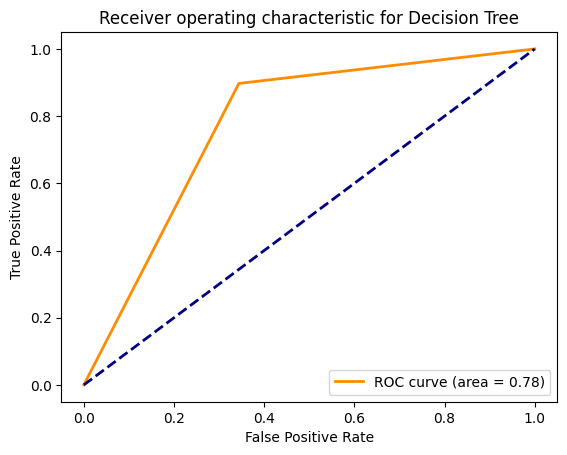

['DT.pkl']

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

k = 8
kf = KFold(n_splits=k, random_state=None)
modelDT = DecisionTreeClassifier()
acc_score = []
y_true = []
y_pred = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = Y[train_index], Y[test_index]

    modelDT.fit(X_train, y_train)

    pred_values = modelDT.predict(X_test)

    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)

    y_true.extend(y_test)
    y_pred.extend(pred_values)

avg_acc_score = sum(acc_score) / k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))


print(classification_report(y_true, y_pred))
# print(confusion_matrix(y_true, y_pred))

# Get confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:\n', cm)

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Decision Tree')
plt.legend(loc="lower right")
plt.show()
joblib.dump(modelDT, "DT.pkl")

# XG Boost

Accuracy of each fold - [0.9166666666666666, 0.9107142857142857, 0.9640718562874252, 0.9221556886227545, 0.9341317365269461]
Average accuracy: 0.9295480467636157
Confusion Matrix:
 [[222  31]
 [ 28 556]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       253
           1       0.95      0.95      0.95       584

    accuracy                           0.93       837
   macro avg       0.92      0.91      0.92       837
weighted avg       0.93      0.93      0.93       837



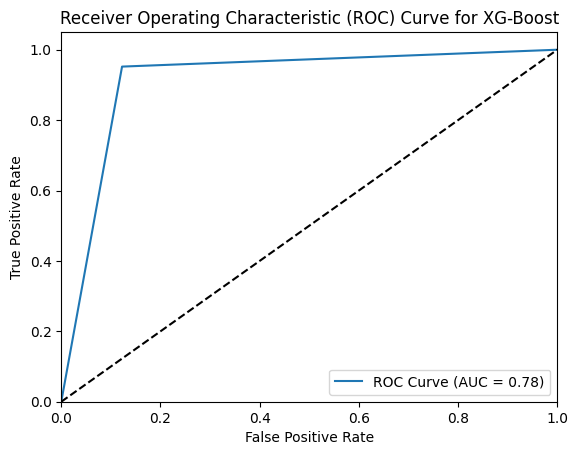

ROC AUC Score: 0.9147625751258867


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:59:47] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import KFold
import xgboost as xgb

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=None)

model_xgb = xgb.XGBClassifier()

acc_score = []
y_pred_list = []
y_test_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = Y[train_index], Y[test_index]

    model_xgb.fit(X_train, y_train)

    y_pred = model_xgb.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_score.append(acc)

    y_pred_list.extend(y_pred)
    y_test_list.extend(y_test)

avg_acc_score = sum(acc_score) / k

print('Accuracy of each fold - {}'.format(acc_score))
print('Average accuracy: {}'.format(avg_acc_score))

# Get confusion matrix
cm = confusion_matrix(y_test_list, y_pred_list)
print('Confusion Matrix:\n', cm)

# Get classification report
cr = classification_report(y_test_list, y_pred_list)
print('Classification Report:\n', cr)


# Get the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test_list, y_pred_list)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XG-Boost')
plt.legend(loc="lower right")
plt.show()

# Get ROC AUC score
roc_auc = roc_auc_score(y_test_list, y_pred_list)
print('ROC AUC Score:', roc_auc)

# Save the trained model
model_xgb.save_model("xgb_model.pkl")





 ### Inference on Test Images

In [ ]:
#!unzip '/content/drive/MyDrive/Colab Notebooks/Data/SIFT/test/tests/robtest1.zip'

In [ ]:
#!unzip '/content/drive/MyDrive/Colab Notebooks/Data/SIFT/test/tests/robtest2.zip'

descriptor shape:  (735, 128)
[0]
descriptor shape:  (730, 128)
[0]
descriptor shape:  (727, 128)
[0]
descriptor shape:  (804, 128)
[0]
descriptor shape:  (753, 128)
[0]
descriptor shape:  (697, 128)
[0]
descriptor shape:  (912, 128)


IndexError: index 2 is out of bounds for axis 0 with size 2

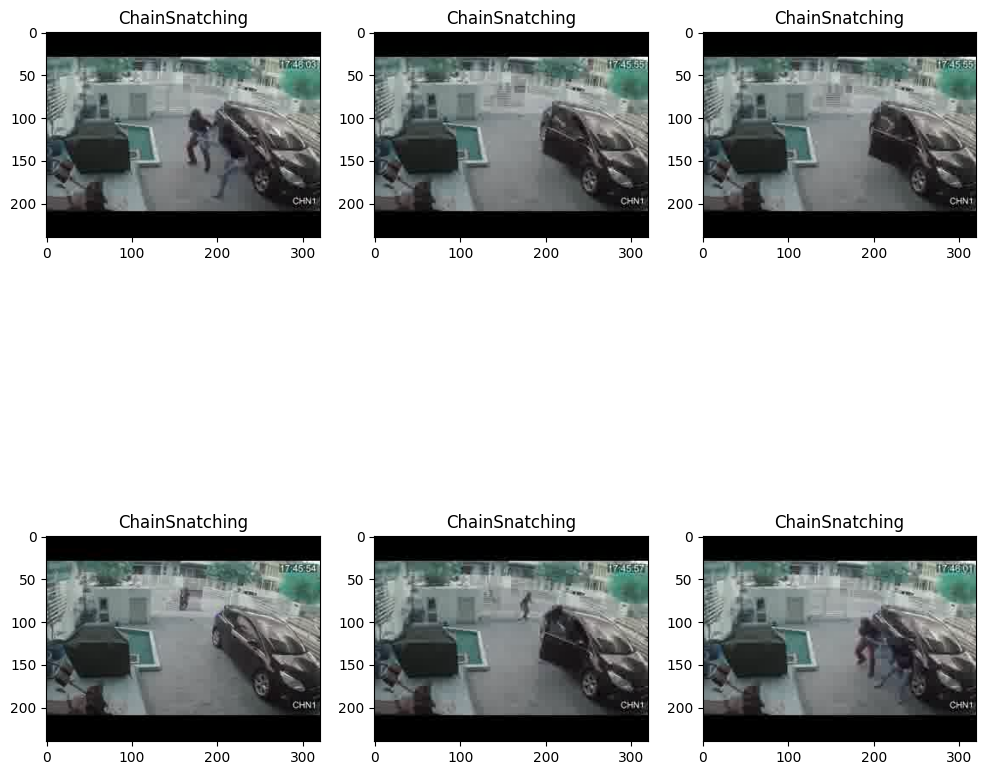

In [ ]:
import joblib
model = joblib.load("RandomForest.pkl")
kmeans = joblib.load('Kmeans_CL_2_Model.sav')
test_folder = r'/content/drive/MyDrive/Colab Notebooks/Data/SIFT/testing'
# Get a list of all image file names in the folder
img_files = os.listdir(test_folder)

# Define the number of rows and columns for the plot grid
num_rows = 2
num_cols = 3

# Create a new figure and set the size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))



for i, img_file in enumerate(img_files):
    data=[]
    # Load the image
    img_path = os.path.join(test_folder, img_file)
    Image = cv2.imread(img_path)

    #gray image
    gray = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (540, 540))


    # creating a Histograms Equalization for folder1(Fall)
    equ = cv2.equalizeHist(gray)

    #Applyed
    canny = cv2.Canny(equ, 150, 150)
    #Applying Sift  Discriptor Abnormal folder
    sift = cv2.SIFT_create()
    kp, descriptors = sift.detectAndCompute(canny, None)

    out=pd.DataFrame(descriptors)
    print('descriptor shape: ', out.shape)

    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    # print(filename)
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12])
    # out = out.astype(np.uint8)
    # hist=np.histogram(Image,bins=[0,1,2,3,4,5])
    #append the dataframe into the array
    data.append(hist[0])

    #convert Array to Dataframe and append to the list
    Output = pd.DataFrame(data)
    pred = model.predict(Output)
     # Add the image to the plot grid and label it with the prediction
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(Image)
    print(pred)
    if pred == 0:
        axes[row, col].set_title('ChainSnatching')
    else:
        axes[row, col].set_title('Normal')

# Show the plot grid
plt.tight_layout()
plt.show()
